In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',100)

In [2]:
df= pd.read_csv("application_data.csv")

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Columns to drop with more than 40% Null's

In [4]:
drop_cols=df.isnull().sum()[df.isnull().sum()/df.shape[0] > .4]/df.shape[0]
df.drop(columns=drop_cols.index,inplace=True)


Datatype check : All the remaining columns has correct datatype

In [5]:
not_req=['FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_PHONE',
       'FLAG_EMAIL','CNT_CHILDREN','NAME_TYPE_SUITE','FLAG_CONT_MOBILE',
        'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
        'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

In [6]:
df.drop(columns=not_req,inplace=True)

In [7]:
df.shape

(307511, 20)

In [8]:
df.CODE_GENDER.value_counts()
df.loc[df.CODE_GENDER=='XNA','CODE_GENDER']= df.CODE_GENDER.mode()

In [9]:
df.ORGANIZATION_TYPE.value_counts(normalize=True)
# as the Organization type = 'XNA' has 18% of records , we are not gonna exclude as  may loss insights from other variables.
#df=df.drop(list(df.loc[df.ORGANIZATION_TYPE=='XNA'].index))

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

CNT_FAM_MEMBERS ,  NAME_TYPE_SUITE , CNT_FAM_MEMBERS , REGION_RATING_CLIENT,  REGION_RATING_CLIENT_W_CITY, 

New col FAMILY_SIZE, derived from CNT_FAM_MEMBERS and then droping the CNT_FAM_MEMBERS column 


In [10]:
df.CNT_FAM_MEMBERS.value_counts(ascending=False,normalize=True)
#Bins divided on basis of Normalized values
df['FAMILY_SIZE']=pd.cut(df.CNT_FAM_MEMBERS,bins=[0,1,3,5,15],labels=['Single','Small','Medium','Large'])
df.drop(columns='CNT_FAM_MEMBERS',inplace=True)

In [11]:
df['AGE_IN_YEARS']=round(abs(df.DAYS_BIRTH)/365)

df.AGE_IN_YEARS.value_counts(ascending=False,normalize=True)

# Drop DAYS_BIRTH variable 
df.drop(columns='DAYS_BIRTH',inplace=True)

In [12]:
df['EXPERIENCE_IN_YEARS']=round(abs(df.DAYS_EMPLOYED)/365)
df.EXPERIENCE_IN_YEARS.value_counts()
# Check if any anomolies in the Age variable and make it NaN
df.loc[df.EXPERIENCE_IN_YEARS>100,'EXPERIENCE_IN_YEARS']=np.NaN
# Drop DAYS_BIRTH variable 
df.drop(columns='DAYS_EMPLOYED',inplace=True)

In [13]:
#DAYS_LAST_PHONE_CHANGE

#df['PHONE_CHANGE_IN_YEARS']=round(abs(df.DAYS_LAST_PHONE_CHANGE)/365)
#df.PHONE_CHANGE_IN_YEARS.value_counts()
# Drop DAYS_LAST_PHONE_CHANGE variable 
#df.drop(columns='DAYS_LAST_PHONE_CHANGE',inplace=True)

In [14]:
df.REGION_POPULATION_RELATIVE.describe(percentiles=[.33,.66])

# based on the max value on REGION_POPULATION_RELATIVE variable 1/3rd and 2/3rd calculated, created a new column Population Density.

df['POPULATION_DENSITY']=pd.cut(df.REGION_POPULATION_RELATIVE,bins=[0,0.024,0.048,1],labels=['Low','Medium','High'])

# drop REGION_POPULATION_RELATIVE
df.drop(columns='REGION_POPULATION_RELATIVE',inplace=True)

In [15]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,FAMILY_SIZE,AGE_IN_YEARS,EXPERIENCE_IN_YEARS,POPULATION_DENSITY
0,100002,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,2,2,Business Entity Type 3,Single,26.0,2.0,Low
1,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,1,1,School,Small,46.0,3.0,Low
2,100004,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,2,2,Government,Single,52.0,1.0,Low
3,100006,0,Cash loans,F,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2,2,Business Entity Type 3,Small,52.0,8.0,Low
4,100007,0,Cash loans,M,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,2,2,Religion,Single,55.0,8.0,Medium


In [16]:
#df['REGISTRATION_IN_YEARS']=round(abs(df.DAYS_REGISTRATION)/365)
#df.REGISTRATION_IN_YEARS.value_counts()

# Drop DAYS_BIRTH variable 
#df.drop(columns='DAYS_REGISTRATION',inplace=True)

In [17]:
#df['ID_PUBLISH_IN_YEARS']=round(abs(df.DAYS_ID_PUBLISH)/365)
#df.ID_PUBLISH_IN_YEARS.value_counts()

# Drop DAYS_BIRTH variable 
#df.drop(columns='DAYS_ID_PUBLISH',inplace=True)

In [18]:
df.AGE_IN_YEARS.describe()
df['AGE_RANGE']=pd.cut(df.AGE_IN_YEARS,bins=[0,30,45,55,100],labels=['<30','30-45','45-55','>55'])

In [19]:
#EXPERIENCE_IN_YEARS
df.EXPERIENCE_IN_YEARS.value_counts()

lab=['0-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50']
df['EXPERIENCE_RANGE']=pd.cut(df.EXPERIENCE_IN_YEARS,bins=list(np.arange(0,51,5)),labels=lab)

In [20]:
df['REGION_RATING']=pd.cut(df.REGION_RATING_CLIENT+df.REGION_RATING_CLIENT_W_CITY/2,bins=[0,1,2,3],labels=['Low Profile','Medium Profile','High Profile'])
df.drop(columns=['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY'],inplace=True)

Univarient analysis Numerical - AMT_INCOME_TOTAL

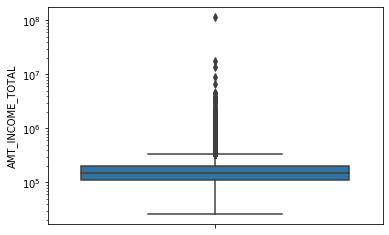

In [23]:
sns.boxplot(data=df,y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.show()

In [24]:
df.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

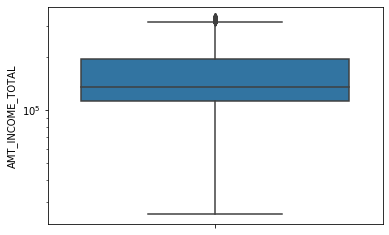

In [25]:
sns.boxplot(data=df[df.AMT_INCOME_TOTAL<337500],y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.show()

In [26]:
df.AMT_INCOME_TOTAL.quantile([0.1, 0.2, 0.3, 0.4, 0.5,.6,.7,.8,.9,0.95,.99,1])

0.10        81000.0
0.20        99000.0
0.30       112500.0
0.40       135000.0
0.50       147150.0
0.60       162000.0
0.70       180000.0
0.80       225000.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

Binning the AMT_INCOME_TOTAL variable

In [27]:
bin=[0,80000,100000,120000,140000,160000,180000,220000,280000,340000,480000,117000000]
label=['<80000','80000-100000','100000-120000','120000-140000','140000-160000',
       '160000-180000','180000-220000','220000-280000','280000-340000','340000-480000','>480000']
df['INCOME_RANGE']=pd.cut(df.AMT_INCOME_TOTAL,bins=bin,labels=label)

Univarient analysis Numerical - AMT_CREDIT

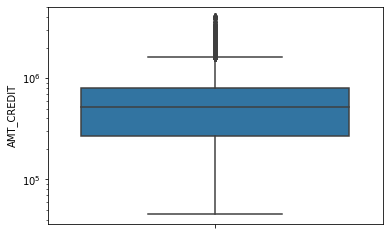

In [28]:
sns.boxplot(data=df,y='AMT_CREDIT')
plt.yscale('log')
plt.show()

In [29]:
df.AMT_CREDIT.quantile([0.1, 0.2, 0.3, 0.4, 0.5,.6,.7,.8,.9,0.95,.99,1])

0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In [30]:
bin=[0,180000,260000,340000,420000,500000,600000,750000,900000,1150000,1350000,1850000,4050000]
label=['<180000','180000-260000','260000-340000','340000-420000','420000-500000',
       '500000-600000','600000-750000','750000-900000','900000-1150000','1150000-1350000','1350000-1850000','>1850000']
df['CREDIT_RANGE']=pd.cut(df.AMT_CREDIT,bins=bin,labels=label)

In [31]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,FAMILY_SIZE,AGE_IN_YEARS,EXPERIENCE_IN_YEARS,POPULATION_DENSITY,AGE_RANGE,EXPERIENCE_RANGE,REGION_RATING,INCOME_RANGE,CREDIT_RANGE
0,100002,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,Single,26.0,2.0,Low,<30,0-5,High Profile,180000-220000,340000-420000
1,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,School,Small,46.0,3.0,Low,45-55,0-5,Medium Profile,220000-280000,1150000-1350000
2,100004,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,Single,52.0,1.0,Low,45-55,0-5,High Profile,<80000,<180000
3,100006,0,Cash loans,F,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3,Small,52.0,8.0,Low,45-55,6-10,High Profile,120000-140000,260000-340000
4,100007,0,Cash loans,M,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion,Single,55.0,8.0,Medium,45-55,6-10,High Profile,120000-140000,500000-600000


In [32]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_df=df.loc[df["TARGET"]==0]
target1_df=df.loc[df["TARGET"]==1]

In [33]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(target0_df)/len(target1_df),2)

11.39

In [ ]:
target0_df.head()

Bi _varient analysis with the target variable

In [ ]:
sns.reset_defaults()
plt.rcdefaults()

In [ ]:
# Count plotting in logarithmic scale

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 10
    plt.rcParams['axes.titlesize'] = 10
    plt.rcParams['axes.titlepad'] = 10
    
    
    #temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique())  #+ 4*len(temp.unique())
    fig.set_size_inches(width , 4)
    plt.yticks()
    plt.xscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, y= col,order=df[col].value_counts().index,palette='magma') 
        
    plt.show()

In [ ]:
uni_variant=[
'NAME_INCOME_TYPE',
'NAME_EDUCATION_TYPE',
'NAME_HOUSING_TYPE',
'OCCUPATION_TYPE',
'AGE_RANGE',
'EXPERIENCE_RANGE',
'INCOME_RANGE',
'CREDIT_RANGE',
'FAMILY_SIZE',
'POPULATION_DENSITY',
]

In [ ]:
for i in uni_variant:
    uniplot(target0_df,col=i,title='Distribution of '+ i)

In [ ]:
for i in uni_variant:
    uniplot(target1_df,col=i,title='Distribution of '+ i)

In [ ]:
# Count plotting in logarithmic scale

def biplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='pastel') 
        
    plt.show()

In [ ]:
bi_varient =[
    'NAME_CONTRACT_TYPE',
'NAME_INCOME_TYPE',
'NAME_EDUCATION_TYPE',
'OCCUPATION_TYPE'


] 

In [ ]:
for j in bi_varient:
    biplot(target0_df,col=j,title='Distribution of '+ j,hue='CODE_GENDER')

In [ ]:
biplot(target0_df,col='OCCUPATION_TYPE',title='Distribution of '+ j,hue='NAME_CONTRACT_TYPE')

In [ ]:
sns.reset_defaults()
for j in ['CREDIT_RANGE','INCOME_RANGE']:
    biplot(target0_df,col=j,title='Distribution of '+ j,hue='NAME_EDUCATION_TYPE')

In [ ]:
sns.reset_defaults()
for j in ['CREDIT_RANGE','INCOME_RANGE']:
    biplot(target0_df,col=j,title='Distribution of '+ j,hue='FAMILY_SIZE')

In [ ]:
sns.reset_defaults()
for j in ['CREDIT_RANGE','INCOME_RANGE']:
    biplot(target0_df,col=j,title='Distribution of '+ j,hue='NAME_CONTRACT_TYPE')

In [ ]:
sns.reset_defaults()
for j in ['CREDIT_RANGE','INCOME_RANGE']:
    biplot(target0_df,col=j,title='Distribution of '+ j,hue='AGE_RANGE')

In [ ]:
sns.reset_defaults()
for j in ['CREDIT_RANGE','INCOME_RANGE']:
    biplot(target0_df,col=j,title='Distribution of '+ j,hue='POPULATION_DENSITY')

In [ ]:
for j in bi_varient:
    biplot(target1_df,col=j,title='Distribution of '+ j,hue='CODE_GENDER')

In [ ]:
biplot(target1_df,col='OCCUPATION_TYPE',title='Distribution of '+ j,hue='NAME_CONTRACT_TYPE')

In [ ]:
sns.reset_defaults()
for j in ['CREDIT_RANGE','INCOME_RANGE']:
    biplot(target1_df,col=j,title='Distribution of '+ j,hue='NAME_EDUCATION_TYPE')

In [ ]:
sns.reset_defaults()
for j in ['CREDIT_RANGE','INCOME_RANGE']:
    biplot(target1_df,col=j,title='Distribution of '+ j,hue='FAMILY_SIZE')

In [ ]:
sns.reset_defaults()
for j in ['CREDIT_RANGE','INCOME_RANGE']:
    biplot(target1_df,col=j,title='Distribution of '+ j,hue='NAME_CONTRACT_TYPE')

In [ ]:
sns.reset_defaults()
for j in ['CREDIT_RANGE','INCOME_RANGE']:
    biplot(target1_df,col=j,title='Distribution of '+ j,hue='AGE_RANGE')

In [ ]:
sns.reset_defaults()
for j in ['CREDIT_RANGE','INCOME_RANGE']:
    biplot(target1_df,col=j,title='Distribution of '+ j,hue='POPULATION_DENSITY')

In [ ]:
corr=df_1.iloc[:,2:].corr()

In [ ]:
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()
corr_df.columns=['Var1','Var2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Correlation_abs']=corr_df.Correlation.abs()
corr_df.sort_values('Correlation_abs',ascending=False,inplace=True)

In [ ]:
corr_df[corr_df.Correlation_abs>.50].reset_index(drop=True)

55374

Previous data 

In [34]:
# Reading the dataset of previous application

df1=pd.read_csv("previous_application.csv")



In [35]:
# Cleaning the missing data

# listing the null values columns having more than 40%

drop_cols_pa=df1.isnull().sum()[df1.isnull().sum()/df1.shape[0] > .4]/df1.shape[0]
df1.drop(columns=drop_cols_pa.index,inplace=True)


In [36]:
df1.shape

(1670214, 26)

In [ ]:
# Removing the column values of 'XNA' and 'XAP'

#df1=df1[~(df1['NAME_CASH_LOAN_PURPOSE'].isin(['XNA','XAP']))]


#As the % of XNA and XAP is high, removing the rows might alter the other insights  



In [37]:
# Now merging the Application dataset with previous appliaction dataset

new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_p')

In [ ]:
new_df.columns[new_df.columns.str.endswith('_')]#.replace('p','')
new_df.columns[new_df.columns.str.endswith('p')]

In [38]:
new_df1 = new_df.rename({
    'NAME_CONTRACT_TYPE_':'NAME_CONTRACT_TYPE', 'AMT_CREDIT_':'AMT_CREDIT', 'AMT_ANNUITY_':'AMT_ANNUITY' ,
       'AMT_GOODS_PRICE_':'AMT_GOODS_PRICE','NAME_CONTRACT_TYPEp':'NAME_CONTRACT_TYPE_PREV', 'AMT_ANNUITYp':'AMT_ANNUITY_PREV',
    'AMT_CREDITp':'AMT_CREDIT_PREV',
       'AMT_GOODS_PRICEp':'AMT_GOODS_PRICE_PREV'}, axis=1
)

In [39]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY','AMT_APPLICATION','NAME_PAYMENT_TYPE','SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
         'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION' ,'DAYS_DECISION' ,'SK_ID_PREV' ,'CHANNEL_TYPE','CODE_REJECT_REASON',
             'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO','NAME_PRODUCT_TYPE'],axis=1,inplace=True)

In [40]:
new_df1.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'FAMILY_SIZE', 'AGE_IN_YEARS',
       'EXPERIENCE_IN_YEARS', 'POPULATION_DENSITY', 'AGE_RANGE',
       'EXPERIENCE_RANGE', 'REGION_RATING', 'INCOME_RANGE', 'CREDIT_RANGE',
       'NAME_CONTRACT_TYPE_PREV', 'AMT_ANNUITY_PREV', 'AMT_CREDIT_PREV',
       'AMT_GOODS_PRICE_PREV', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE'],
      dtype='object')

In [52]:
new_df1.loc[new_df1.NAME_CONTRACT_TYPE_PREV=='XNA','NAME_CONTRACT_TYPE_PREV']=np.NaN 
new_df1.loc[new_df1.NAME_CLIENT_TYPE=='XNA','NAME_CLIENT_TYPE']=np.NaN 



In [54]:
new_df1['CNT']=1

In [106]:
# Now, plotting the correlation with heat map as it is the best choice to visulaize

# figure size

def heatmap(data1,title1,data2,title2):
    plt.figure(figsize=(11,5))
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['axes.titlepad'] = 10
    plt.rcParams["axes.labelsize"] = 12
    plt.subplot(1,2,1)

# heatmap with a color map of choice


    sns.heatmap(data1, cmap="Blues",annot=False)
    plt.title(title1)
    plt.yticks(rotation=0)
    plt.subplot(1,2,2)
    sns.heatmap(data2, cmap="Blues",annot=False,yticklabels=False)
    
    plt.title(title2)
    plt.yticks(rotation=0)
    plt.show()



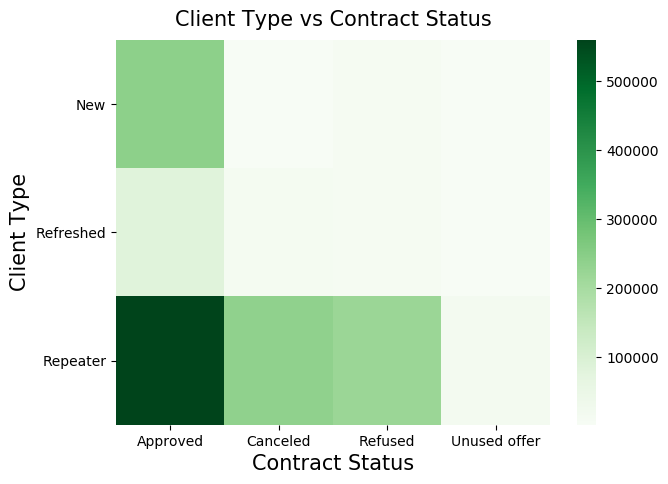

In [124]:
# For Target 0

res=pd.pivot_table(data=new_df1,index='NAME_CLIENT_TYPE',columns='NAME_CONTRACT_STATUS',values='CNT'
               ,aggfunc=np.sum)

plt.figure(figsize=(7,5)) 
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 10
plt.rcParams["axes.labelsize"] = 15
sns.heatmap(res, cmap="Greens",annot=False)
   
plt.title("Client Type vs Contract Status")
plt.xlabel('Contract Status')
plt.ylabel('Client Type')
plt.yticks(rotation=0)
plt.show()



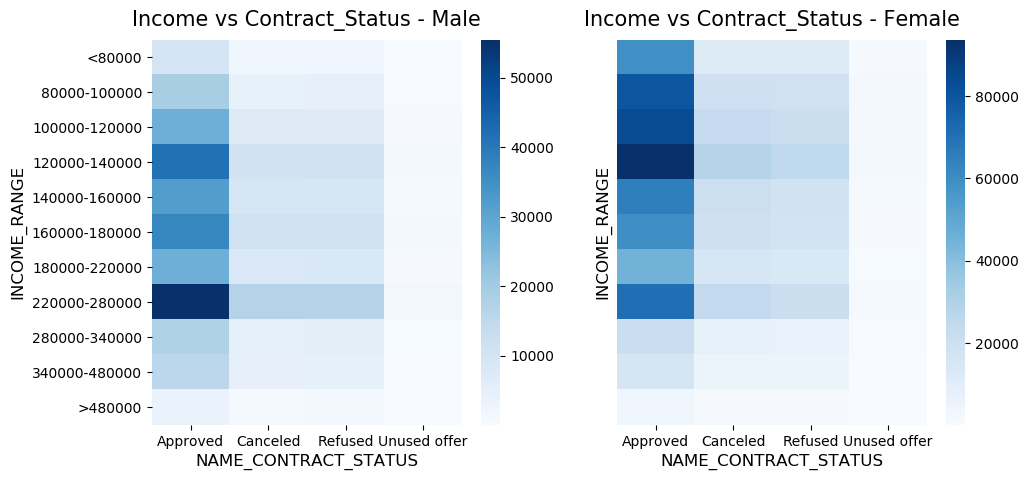

In [107]:
# For Target 0

res=pd.pivot_table(data=new_df1[new_df1.CODE_GENDER=='M'],index='INCOME_RANGE',columns='NAME_CONTRACT_STATUS',values='CNT'
               ,aggfunc=np.sum)
res1=pd.pivot_table(data=new_df1[new_df1.CODE_GENDER=='F'],index='INCOME_RANGE',columns='NAME_CONTRACT_STATUS',values='CNT'
               ,aggfunc=np.sum)
sns.reset_defaults()
heatmap(data1=res,title1='Income vs Contract_Status - Male',data2=res1,title2='Income vs Contract_Status - Female')




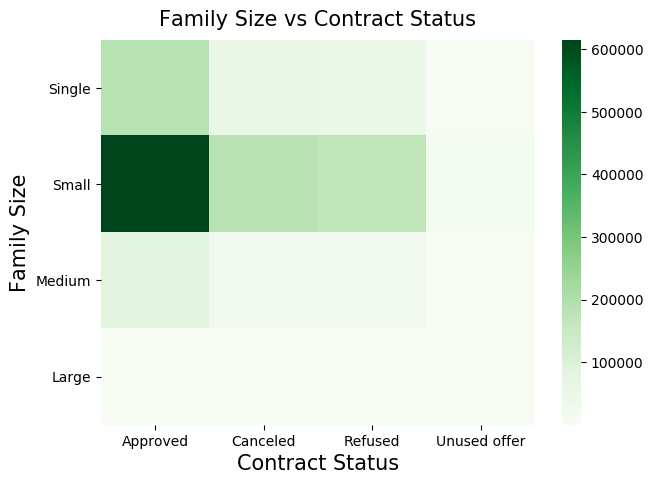

In [123]:
# For Target 0

res=pd.pivot_table(data=new_df1,index='FAMILY_SIZE',columns='NAME_CONTRACT_STATUS',values='CNT'
               ,aggfunc=np.sum)
plt.figure(figsize=(7,5)) 
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 10
plt.rcParams["axes.labelsize"] = 15
sns.heatmap(res, cmap="Greens",annot=False)
    
plt.title("Family Size vs Contract Status")
plt.xlabel('Contract Status')
plt.ylabel('Family Size')
plt.yticks(rotation=0)
plt.show()




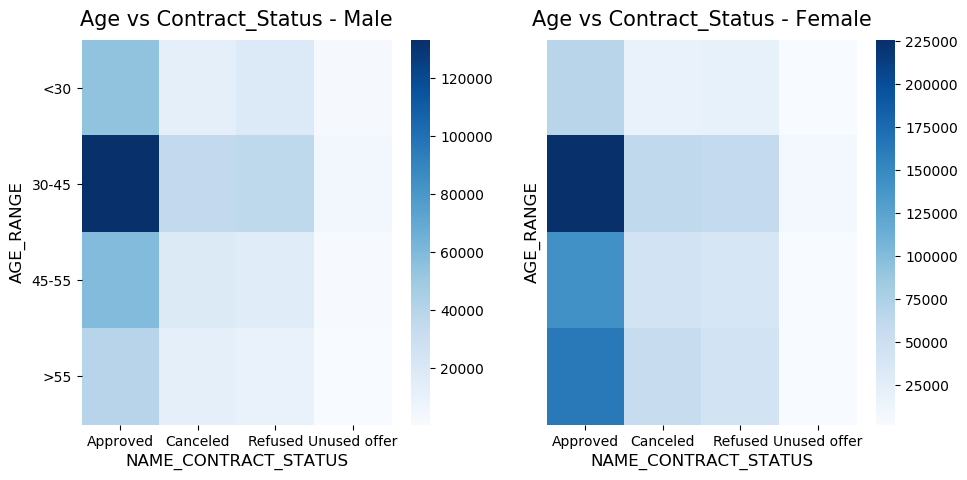

In [109]:
# For Target 0

res=pd.pivot_table(data=new_df1[new_df1.CODE_GENDER=='M'],index='AGE_RANGE',columns='NAME_CONTRACT_STATUS',values='CNT'
               ,aggfunc=np.sum)
res1=pd.pivot_table(data=new_df1[new_df1.CODE_GENDER=='F'],index='AGE_RANGE',columns='NAME_CONTRACT_STATUS',values='CNT'
               ,aggfunc=np.sum)
sns.reset_defaults()
heatmap(data1=res,title1='Age vs Contract_Status - Male',data2=res1,title2='Age vs Contract_Status - Female')




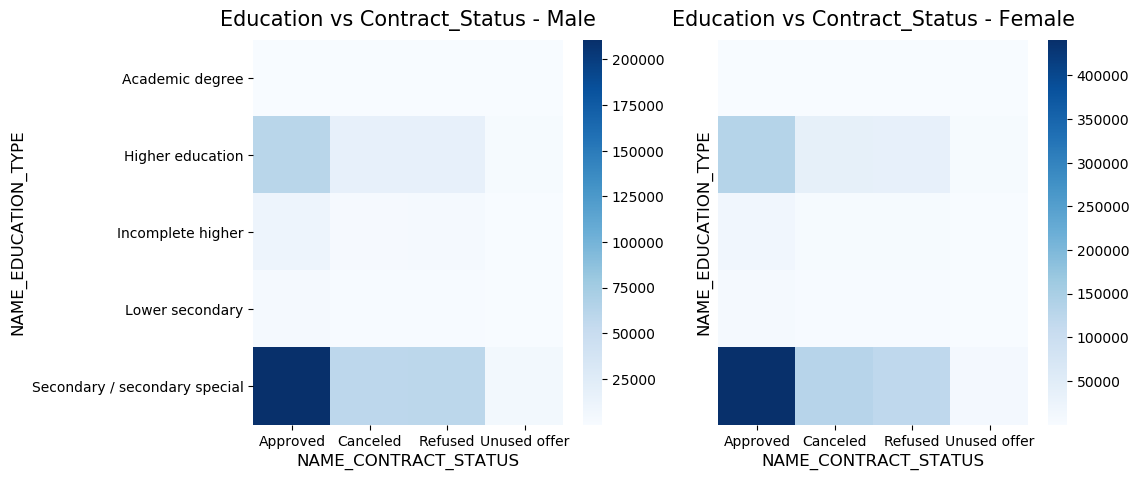

In [110]:
# For Target 0

res=pd.pivot_table(data=new_df1[new_df1.CODE_GENDER=='M'],index='NAME_EDUCATION_TYPE',columns='NAME_CONTRACT_STATUS',values='CNT'
               ,aggfunc=np.sum)
res1=pd.pivot_table(data=new_df1[new_df1.CODE_GENDER=='F'],index='NAME_EDUCATION_TYPE',columns='NAME_CONTRACT_STATUS',values='CNT'
               ,aggfunc=np.sum)
sns.reset_defaults()
heatmap(data1=res,title1='Education vs Contract_Status - Male',data2=res1,title2='Education vs Contract_Status - Female')




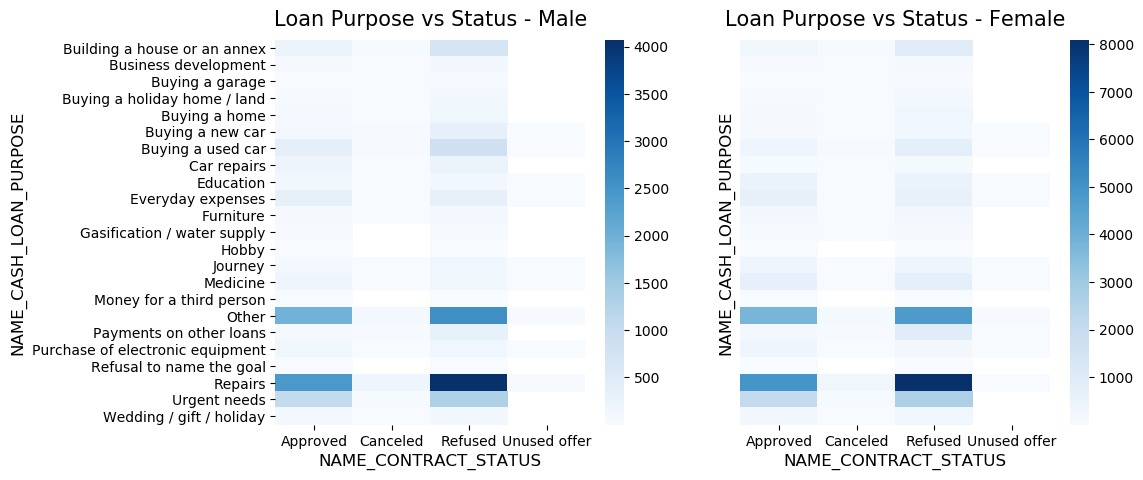

In [116]:
# For Target 0

res=pd.pivot_table(data=new_df1[(new_df1.CODE_GENDER=='M') & ~(new_df1.NAME_CASH_LOAN_PURPOSE.isin(['XAP','XNA']))],index='NAME_CASH_LOAN_PURPOSE',columns='NAME_CONTRACT_STATUS',values='CNT'
               ,aggfunc=np.sum)
res1=pd.pivot_table(data=new_df1[(new_df1.CODE_GENDER=='F') & ~(new_df1.NAME_CASH_LOAN_PURPOSE.isin(['XAP','XNA']))],index='NAME_CASH_LOAN_PURPOSE',columns='NAME_CONTRACT_STATUS',values='CNT'
               ,aggfunc=np.sum)
sns.reset_defaults()
heatmap(data1=res,title1='Loan Purpose vs Status - Male',data2=res1,title2='Loan Purpose vs Status - Female')




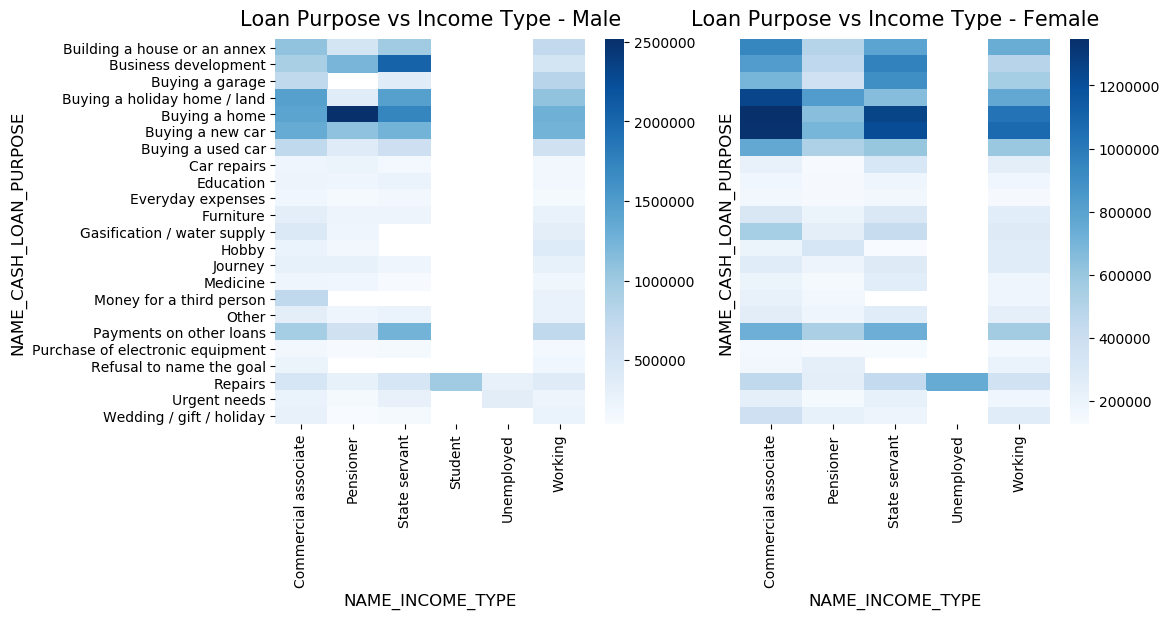

In [118]:
# For Target 0

res=pd.pivot_table(data=new_df1[(new_df1.CODE_GENDER=='M') & ~(new_df1.NAME_CASH_LOAN_PURPOSE.isin(['XAP','XNA']))],index='NAME_CASH_LOAN_PURPOSE',columns='NAME_INCOME_TYPE',values='AMT_CREDIT_PREV'
               ,aggfunc=np.median)
res1=pd.pivot_table(data=new_df1[(new_df1.CODE_GENDER=='F') & ~(new_df1.NAME_CASH_LOAN_PURPOSE.isin(['XAP','XNA']))],index='NAME_CASH_LOAN_PURPOSE',columns='NAME_INCOME_TYPE',values='AMT_CREDIT_PREV'
               ,aggfunc=np.median)
sns.reset_defaults()
heatmap(data1=res,title1='Loan Purpose vs Income Type - Male',data2=res1,title2='Loan Purpose vs Income Type - Female')




In [119]:
new_df1.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,FAMILY_SIZE,AGE_IN_YEARS,EXPERIENCE_IN_YEARS,POPULATION_DENSITY,AGE_RANGE,EXPERIENCE_RANGE,REGION_RATING,INCOME_RANGE,CREDIT_RANGE,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_CREDIT_PREV,AMT_GOODS_PRICE_PREV,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,CNT
0,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,Single,26.0,2.0,Low,<30,0-5,High Profile,180000-220000,340000-420000,Consumer loans,9251.775,179055.0,179055.0,XAP,Approved,New,1
1,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,School,Small,46.0,3.0,Low,45-55,0-5,Medium Profile,220000-280000,1150000-1350000,Cash loans,98356.995,1035882.0,900000.0,XNA,Approved,Repeater,1
2,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,School,Small,46.0,3.0,Low,45-55,0-5,Medium Profile,220000-280000,1150000-1350000,Consumer loans,64567.665,348637.5,337500.0,XAP,Approved,Refreshed,1
3,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,School,Small,46.0,3.0,Low,45-55,0-5,Medium Profile,220000-280000,1150000-1350000,Consumer loans,6737.310,68053.5,68809.5,XAP,Approved,Refreshed,1
4,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,Single,52.0,1.0,Low,45-55,0-5,High Profile,<80000,<180000,Consumer loans,5357.250,20106.0,24282.0,XAP,Approved,New,1


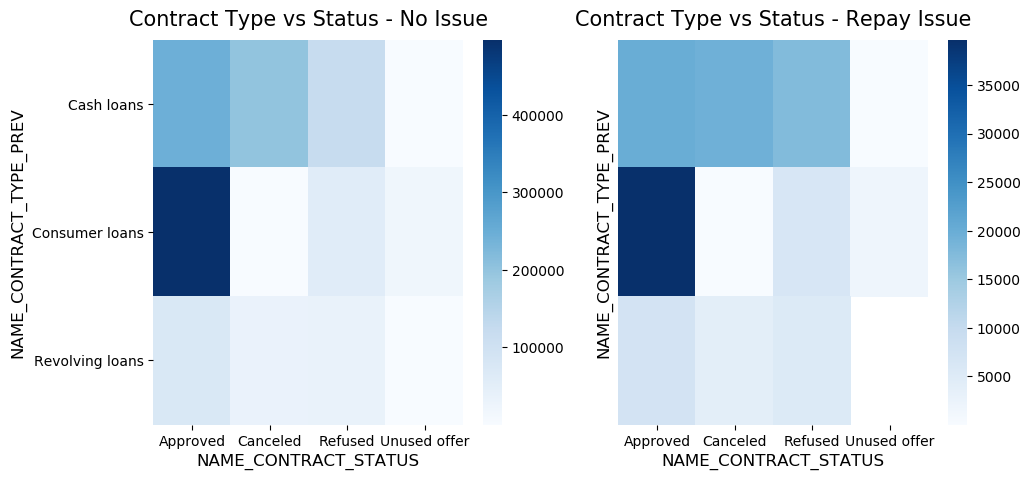

In [122]:
# For Target 0

res=pd.pivot_table(data=new_df1[new_df1.TARGET==0],index='NAME_CONTRACT_TYPE_PREV',columns='NAME_CONTRACT_STATUS',values='CNT'
               ,aggfunc=np.sum)
res1=pd.pivot_table(data=new_df1[new_df1.TARGET==1],index='NAME_CONTRACT_TYPE_PREV',columns='NAME_CONTRACT_STATUS',values='CNT'
               ,aggfunc=np.sum)
sns.reset_defaults()
heatmap(data1=res,title1='Contract Type vs Status - No Issue',data2=res1,title2='Contract Type vs Status - Repay Issue')


